In [2]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('D:'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:10.15405_epsbs.2021.07.74 (1).pdf
D:10.15405_epsbs.2021.07.74.pdf
D:elevoc_dnn_kernel.log
D:Marketing.csv
D:$RECYCLE.BIN\S-1-5-21-3720157100-4038655909-1241690468-1001\desktop.ini
D:instagram-analysis\comments.csv
D:instagram-analysis\follows.csv
D:instagram-analysis\likes.csv
D:instagram-analysis\photos.csv
D:instagram-analysis\photo_tags.csv
D:instagram-analysis\tags.csv
D:instagram-analysis\users.csv
D:Semester 6\Screenshot 2024-05-01 191323.png
D:Semester 6\Screenshot 2024-05-01 220043.png
D:Semester 6\Ai\Lec-02.pdf
D:Semester 6\Ai\Lect-03.pdf
D:Semester 6\Ai\lect-04.pdf
D:Semester 6\Ai\AI assignment\assignment.ipynb
D:Semester 6\Ai\AI assignment\futureinternet-09-00076-v2.pdf
D:Semester 6\Ai\AI assignment\Ijime+V1-N1-A1.pdf
D:Semester 6\computer network\Lecture 1.pptx
D:Semester 6\DIP\BOOK.pdf
D:Semester 6\DIP\lecture01.pdf
D:Semester 6\Mobile app development\Lecture 01.pptx
D:Semester 6\Mobile app development\Lecture 02.pptx
D:Semester 6\Mobile app development\Lecture 03.pptx
D

In [3]:
# Destination path
dest_path = 'D:instagram-analysis'

# Create the destination directory
os.makedirs(dest_path, exist_ok=True)



# List the files in the directory
file_names = os.listdir(dest_path)
file_names

['comments.csv',
 'follows.csv',
 'likes.csv',
 'photos.csv',
 'photo_tags.csv',
 'tags.csv',
 'users.csv']

In [4]:
import pandas as pd

# Define the full paths to the files
files_path = {file_name: os.path.join(dest_path, file_name) for file_name in file_names}

# Load the datasets into pandas DataFrames
dataframes = {file_name[:-4]: pd.read_csv(files_path[file_name]) for file_name in file_names}

# Display the first few rows of each DataFrame
first_rows = {df_name: df.head() for df_name, df in dataframes.items()}
first_rows

{'comments':    id            comment_text  user_id  photo_id           created_at
 0   1         unde at dolorem        2         1  2023-05-13 15:14:58
 1   2         quae ea ducimus        3         1  2023-05-13 15:14:58
 2   3      alias a voluptatum        5         1  2023-05-13 15:14:58
 3   4    facere suscipit sunt       14         1  2023-05-13 15:14:58
 4   5  totam eligendi quaerat       17         1  2023-05-13 15:14:58,
 'follows':    follower_id  followee_id           created_at
 0            2            1  2023-05-13 15:14:58
 1            2            3  2023-05-13 15:14:58
 2            2            4  2023-05-13 15:14:58
 3            2            5  2023-05-13 15:14:58
 4            2            6  2023-05-13 15:14:58,
 'likes':    user_id  photo_id           created_at
 0        2         1  2023-05-13 15:14:58
 1        2         4  2023-05-13 15:14:58
 2        2         8  2023-05-13 15:14:58
 3        2         9  2023-05-13 15:14:58
 4        2        10  20

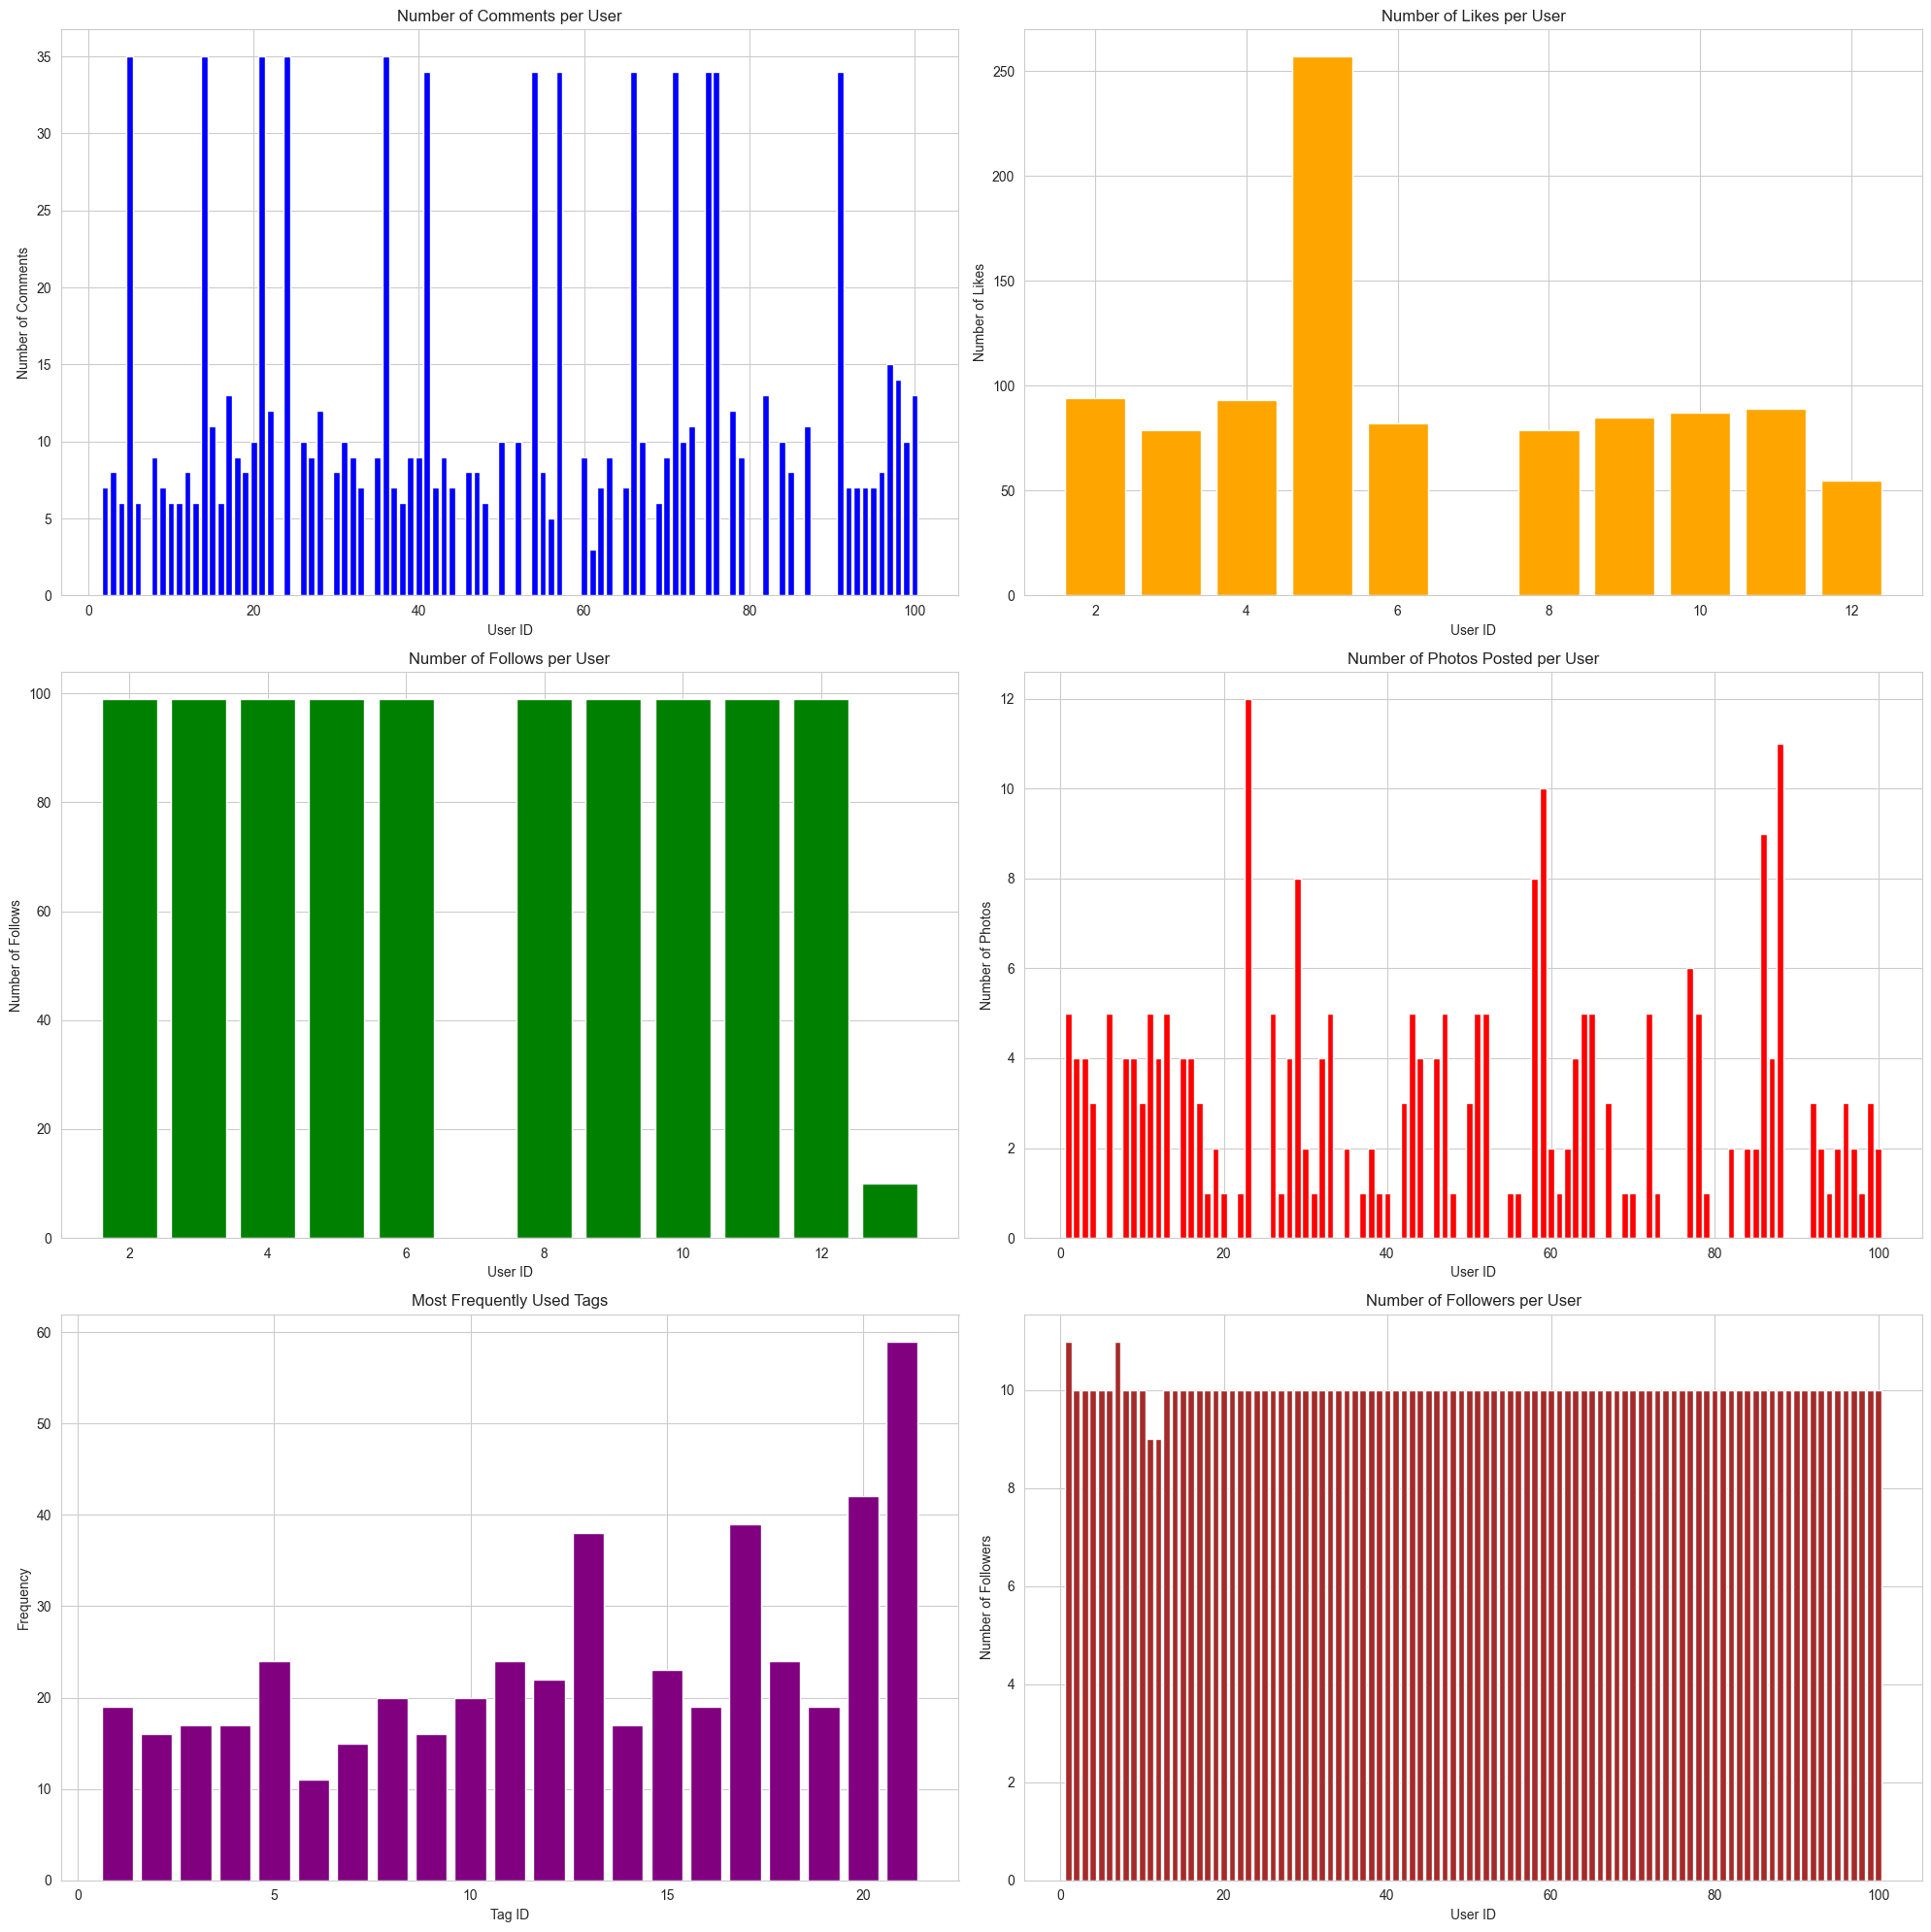

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set_style("whitegrid")

# Calculate number of comments, likes, and follows per user
comments_per_user = dataframes['comments']['user_id'].value_counts()
likes_per_user = dataframes['likes']['user_id'].value_counts()
follows_per_user = dataframes['follows']['follower_id'].value_counts()

# Calculate the frequency of posting photos by each user
photos_per_user = dataframes['photos']['user_id'].value_counts()

# Calculate the most frequently used tags
tag_counts = dataframes['photo_tags']['tag_id'].value_counts()

# Calculate the number of followers each user has
followers_count = dataframes['follows']['followee_id'].value_counts()

# Define the figure and the axes
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

# Plot the number of comments per user
ax[0, 0].bar(comments_per_user.index, comments_per_user.values, color='blue')
ax[0, 0].set_title('Number of Comments per User')
ax[0, 0].set_xlabel('User ID')
ax[0, 0].set_ylabel('Number of Comments')

# Plot the number of likes per user
ax[0, 1].bar(likes_per_user.index, likes_per_user.values, color='orange')
ax[0, 1].set_title('Number of Likes per User')
ax[0, 1].set_xlabel('User ID')
ax[0, 1].set_ylabel('Number of Likes')

# Plot the number of follows per user
ax[1, 0].bar(follows_per_user.index, follows_per_user.values, color='green')
ax[1, 0].set_title('Number of Follows per User')
ax[1, 0].set_xlabel('User ID')
ax[1, 0].set_ylabel('Number of Follows')

# Plot the frequency of posting photos by each user
ax[1, 1].bar(photos_per_user.index, photos_per_user.values, color='red')
ax[1, 1].set_title('Number of Photos Posted per User')
ax[1, 1].set_xlabel('User ID')
ax[1, 1].set_ylabel('Number of Photos')

# Plot the most frequently used tags
ax[2, 0].bar(tag_counts.index, tag_counts.values, color='purple')
ax[2, 0].set_title('Most Frequently Used Tags')
ax[2, 0].set_xlabel('Tag ID')
ax[2, 0].set_ylabel('Frequency')

# Plot the number of followers each user has
ax[2, 1].bar(followers_count.index, followers_count.values, color='brown')
ax[2, 1].set_title('Number of Followers per User')
ax[2, 1].set_xlabel('User ID')
ax[2, 1].set_ylabel('Number of Followers')

# Show the plot
plt.tight_layout()
plt.show()

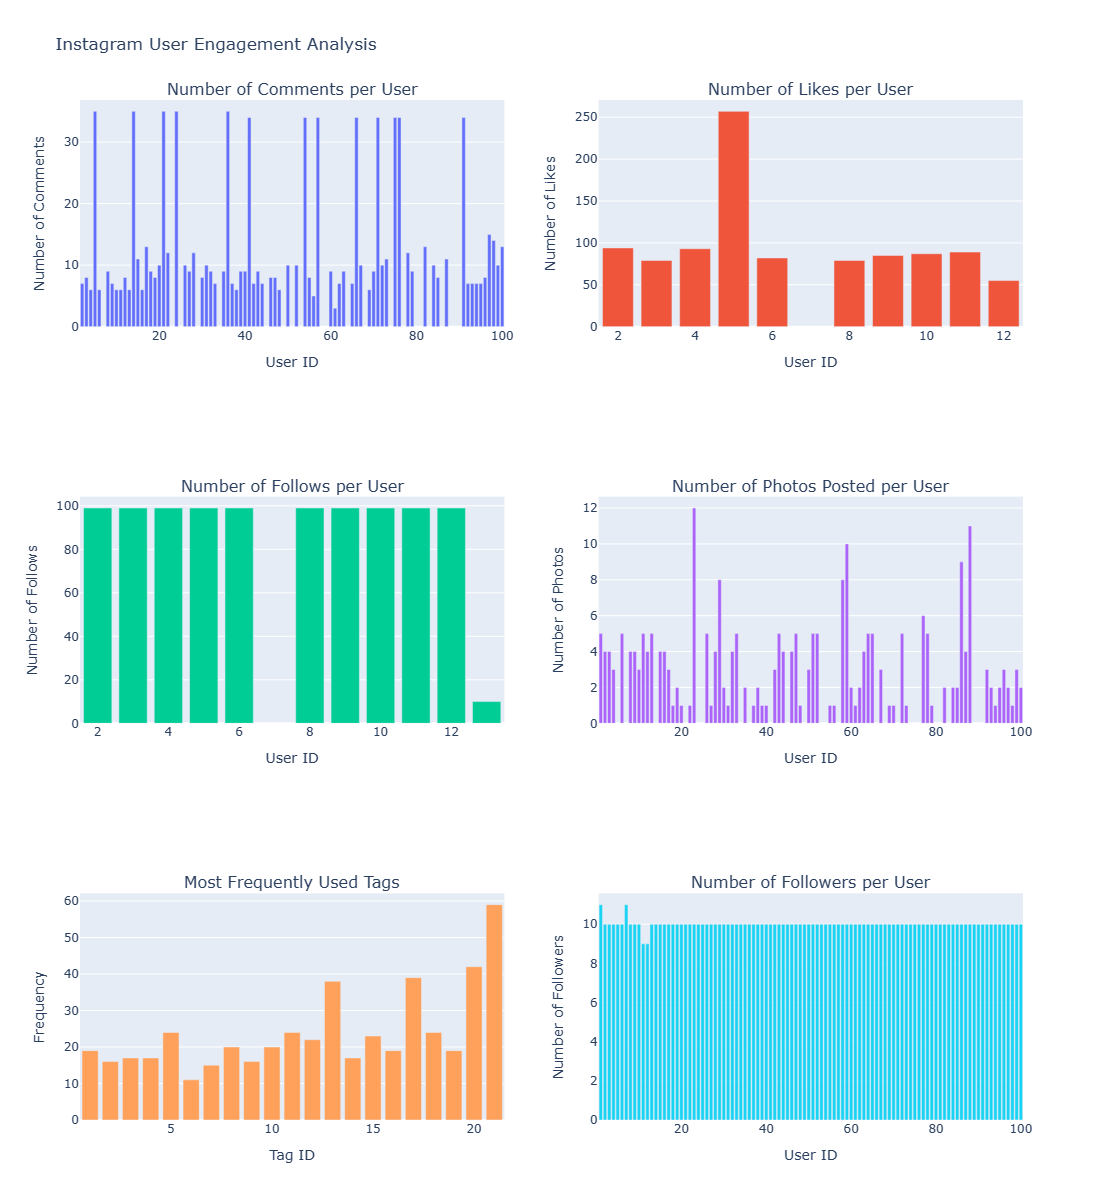

In [12]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots: 2 rows, 2 columns
fig = make_subplots(rows=3, cols=2, subplot_titles=("Number of Comments per User", 
                                                    "Number of Likes per User", 
                                                    "Number of Follows per User",
                                                    "Number of Photos Posted per User",
                                                    "Most Frequently Used Tags",
                                                    "Number of Followers per User"))

# Add traces
fig.add_trace(go.Bar(x=comments_per_user.index, y=comments_per_user.values, name='Comments'), row=1, col=1)
fig.add_trace(go.Bar(x=likes_per_user.index, y=likes_per_user.values, name='Likes'), row=1, col=2)
fig.add_trace(go.Bar(x=follows_per_user.index, y=follows_per_user.values, name='Follows'), row=2, col=1)
fig.add_trace(go.Bar(x=photos_per_user.index, y=photos_per_user.values, name='Photos'), row=2, col=2)
fig.add_trace(go.Bar(x=tag_counts.index, y=tag_counts.values, name='Tags'), row=3, col=1)
fig.add_trace(go.Bar(x=followers_count.index, y=followers_count.values, name='Followers'), row=3, col=2)

# Update xaxis properties
fig.update_xaxes(title_text="User ID", row=1, col=1)
fig.update_xaxes(title_text="User ID", row=1, col=2)
fig.update_xaxes(title_text="User ID", row=2, col=1)
fig.update_xaxes(title_text="User ID", row=2, col=2)
fig.update_xaxes(title_text="Tag ID", row=3, col=1)
fig.update_xaxes(title_text="User ID", row=3, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="Number of Comments", row=1, col=1)
fig.update_yaxes(title_text="Number of Likes", row=1, col=2)
fig.update_yaxes(title_text="Number of Follows", row=2, col=1)
fig.update_yaxes(title_text="Number of Photos", row=2, col=2)
fig.update_yaxes(title_text="Frequency", row=3, col=1)
fig.update_yaxes(title_text="Number of Followers", row=3, col=2)

# Update title and height
fig.update_layout(title_text="Instagram User Engagement Analysis", height=1200, showlegend=False)

fig.show()

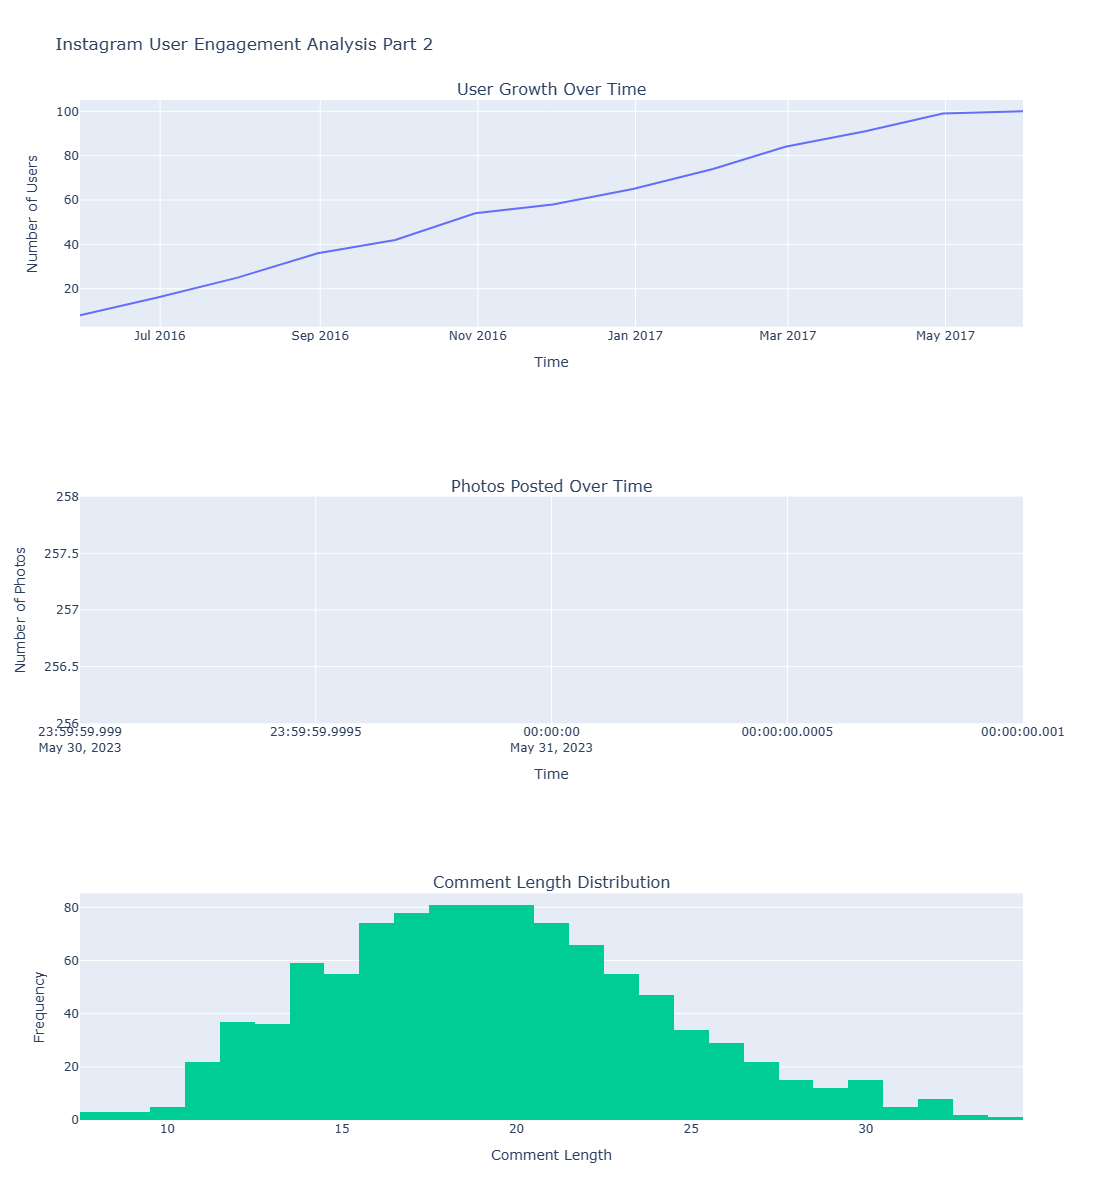

In [15]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Convert 'created_at' columns to datetime
dataframes['users']['created_at'] = pd.to_datetime(dataframes['users']['created_at'])
dataframes['photos']['created_dat'] = pd.to_datetime(dataframes['photos']['created_dat'])
dataframes['comments']['created_at'] = pd.to_datetime(dataframes['comments']['created_at'])

# Calculate user growth and photos posted over time
user_growth = dataframes['users']['created_at'].value_counts().resample('M').sum().cumsum()
photos_over_time = dataframes['photos']['created_dat'].value_counts().resample('M').sum().cumsum()

# Calculate comment length
dataframes['comments']['comment_length'] = dataframes['comments']['comment_text'].apply(len)
comment_length = dataframes['comments']['comment_length']

# Create subplots
fig = make_subplots(rows=3, cols=1, subplot_titles=("User Growth Over Time", 
                                                    "Photos Posted Over Time", 
                                                    "Comment Length Distribution"))

# Add traces
fig.add_trace(go.Scatter(x=user_growth.index, y=user_growth.values, mode='lines', name='Users'), row=1, col=1)
fig.add_trace(go.Scatter(x=photos_over_time.index, y=photos_over_time.values, mode='lines', name='Photos'), row=2, col=1)
fig.add_trace(go.Histogram(x=comment_length.values, name='Comments'), row=3, col=1)

# Update xaxis properties
fig.update_xaxes(title_text="Time", row=1, col=1)
fig.update_xaxes(title_text="Time", row=2, col=1)
fig.update_xaxes(title_text="Comment Length", row=3, col=1)

# Update yaxis properties
fig.update_yaxes(title_text="Number of Users", row=1, col=1)
fig.update_yaxes(title_text="Number of Photos", row=2, col=1)
fig.update_yaxes(title_text="Frequency", row=3, col=1)

# Update title and height
fig.update_layout(title_text="Instagram User Engagement Analysis Part 2", height=1200, showlegend=False)

fig.show()


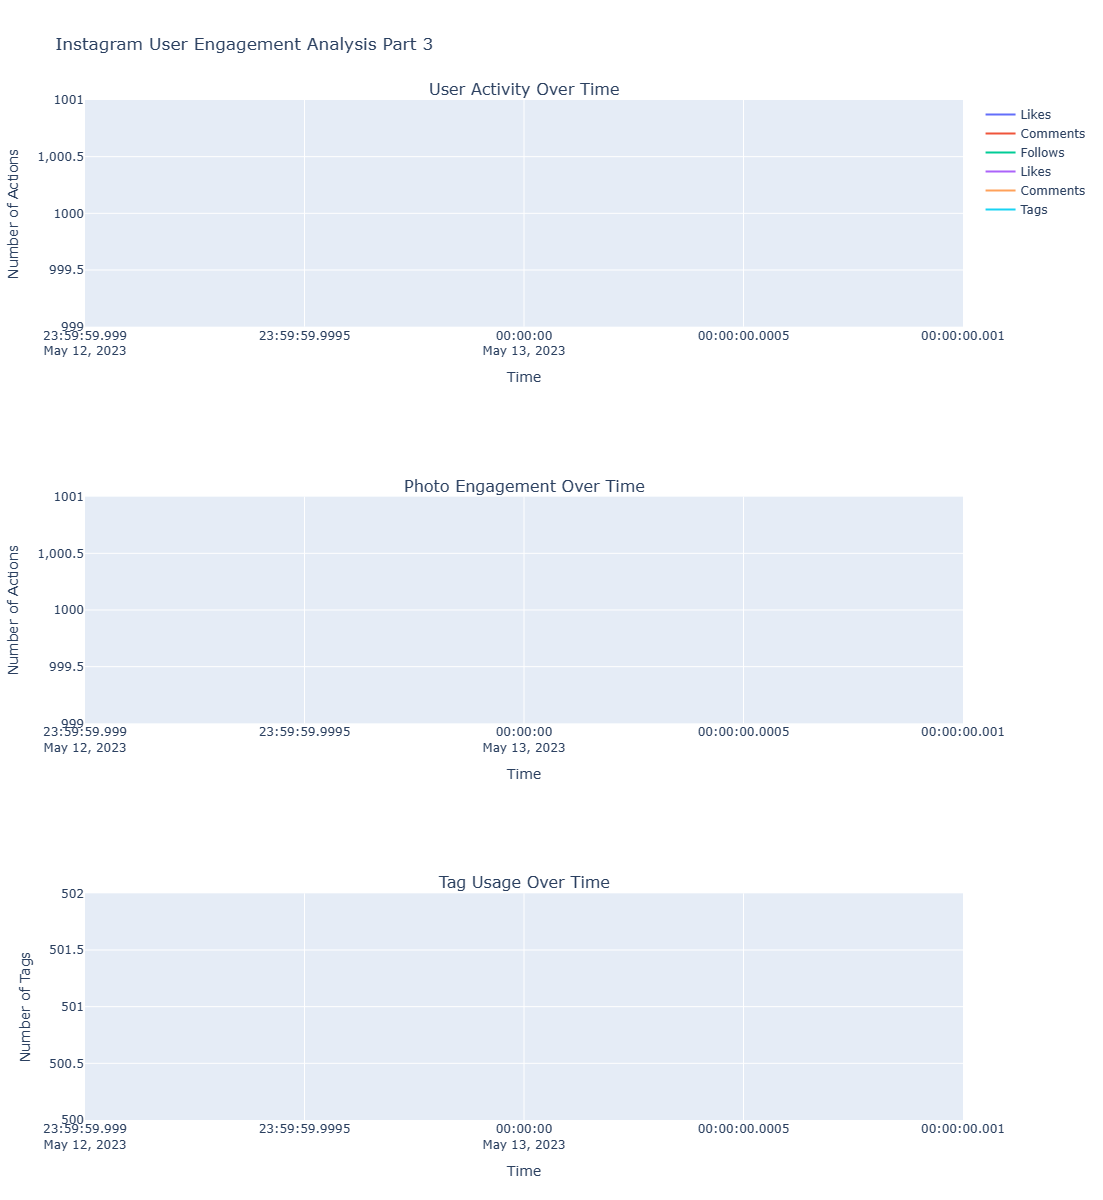

In [16]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Convert 'created_at' columns to datetime
dataframes['likes']['created_at'] = pd.to_datetime(dataframes['likes']['created_at'])
dataframes['comments']['created_at'] = pd.to_datetime(dataframes['comments']['created_at'])
dataframes['follows']['created_at'] = pd.to_datetime(dataframes['follows']['created_at'])
dataframes['photos']['created_dat'] = pd.to_datetime(dataframes['photos']['created_dat'])

# Calculate user activity over time
likes_over_time = dataframes['likes']['created_at'].value_counts().resample('D').sum().cumsum()
comments_over_time = dataframes['comments']['created_at'].value_counts().resample('D').sum().cumsum()
follows_over_time = dataframes['follows']['created_at'].value_counts().resample('D').sum().cumsum()

# Join the likes and photos dataframes and then group by date
likes_with_time = dataframes['likes'].merge(dataframes['photos'], left_on='photo_id', right_on='id')
likes_per_photo = likes_with_time.groupby(likes_with_time['created_dat'].dt.date).count()['photo_id']

# Join the comments and photos dataframes and then group by date
comments_with_time = dataframes['comments'].merge(dataframes['photos'], left_on='photo_id', right_on='id')
comments_per_photo = comments_with_time.groupby(comments_with_time['created_at'].dt.date).count()['photo_id']

# Create subplots
fig = make_subplots(rows=3, cols=1, subplot_titles=("User Activity Over Time", 
                                                    "Photo Engagement Over Time", 
                                                    "Tag Usage Over Time"))

# Add traces
fig.add_trace(go.Scatter(x=likes_over_time.index, y=likes_over_time.values, mode='lines', name='Likes'), row=1, col=1)
fig.add_trace(go.Scatter(x=comments_over_time.index, y=comments_over_time.values, mode='lines', name='Comments'), row=1, col=1)
fig.add_trace(go.Scatter(x=follows_over_time.index, y=follows_over_time.values, mode='lines', name='Follows'), row=1, col=1)
fig.add_trace(go.Scatter(x=likes_per_photo.index, y=likes_per_photo.values, mode='lines', name='Likes'), row=2, col=1)
fig.add_trace(go.Scatter(x=comments_per_photo.index, y=comments_per_photo.values, mode='lines', name='Comments'), row=2, col=1)
# For the tag usage over time, we need to join the photo_tags and photos dataframes first.
photo_tags_with_time = dataframes['photo_tags'].merge(dataframes['photos'], left_on='photo_id', right_on='id')
photo_tags_with_time['created_dat'] = pd.to_datetime(photo_tags_with_time['created_dat'])
tags_over_time = photo_tags_with_time.groupby(photo_tags_with_time['created_dat'].dt.date).count()['tag_id']
fig.add_trace(go.Scatter(x=tags_over_time.index, y=tags_over_time.values, mode='lines', name='Tags'), row=3, col=1)

# Update xaxis properties
fig.update_xaxes(title_text="Time", row=1, col=1)
fig.update_xaxes(title_text="Time", row=2, col=1)
fig.update_xaxes(title_text="Time", row=3, col=1)

# Update yaxis properties
fig.update_yaxes(title_text="Number of Actions", row=1, col=1)
fig.update_yaxes(title_text="Number of Actions", row=2, col=1)
fig.update_yaxes(title_text="Number of Tags", row=3, col=1)

# Update title and height
fig.update_layout(title_text="Instagram User Engagement Analysis Part 3", height=1200, showlegend=True)

fig.show()